# Epeak-Eiso.ipynb for GW Counterparts (SGRBs)

In [27]:
import numpy as np
import h5py
from astropy.cosmology import LambdaCDM
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from tqdm import tqdm

with h5py.File('nsns_population_joan.hdf5', 'r') as table:
    z = table['z'][()]
    Epeak = np.log10(table['Epeak'][()])
    #Epeak_err = 0.1 * Epeak # 10% errors on Epeak
    Epeak_err = 1

    original_Eiso = np.log10(table['Eiso'][()])

nan_mask1 = np.isnan(original_Eiso)
nan_mask2 = np.isnan(Epeak)
combined_nan_mask = nan_mask1 | nan_mask2
inverse_mask = ~combined_nan_mask
z = z[inverse_mask]
original_Eiso = original_Eiso[inverse_mask]
Epeak = Epeak[inverse_mask]

original_Eiso_bc = original_Eiso - np.mean(original_Eiso)
Epeak_bc = Epeak - np.mean(Epeak)

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_10667/2219107331.py:14: RuntimeWarning: divide by zero encountered in log10
  original_Eiso = np.log10(table['Eiso'][()])
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_10667/2219107331.py:14: RuntimeWarning: invalid value encountered in log10
  original_Eiso = np.log10(table['Eiso'][()])
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_10667/2219107331.py:24: RuntimeWarning: invalid value encountered in subtract
  original_Eiso_bc = original_Eiso - np.mean(original_Eiso)


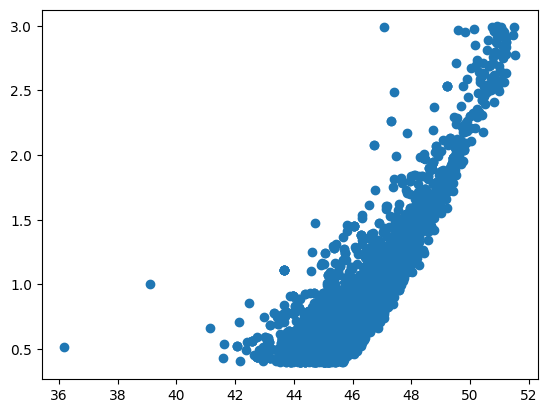

In [28]:
plt.figure()
plt.scatter(original_Eiso, Epeak)

# Single Correlation

In [40]:
factor = 1
extra_err = np.log10(factor)
total_err = Epeak_err + extra_err

standard_cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
standard_dl = standard_cosmo.luminosity_distance(z)

def model(x, p1, p2):
    return p1*x + p2

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
dl = cosmo.luminosity_distance(z).value


# print('z\tstddl\tdl\tEiso\tEiso_bc')
Eiso = 2*np.log10(dl/standard_dl) + original_Eiso
Eiso_bc = Eiso - np.mean(Eiso)
# for i in range(len(z)):
#     print(z,standard_dl, dl[i], Eiso)

if np.isnan(Eiso_bc).any():
    print('WRONG; WRONG!')

popt, pcov = curve_fit(model, Eiso_bc, Epeak_bc, sigma=total_err, p0=[0.5, 0.0], bounds=([-10.0, -10.0], [10.0, 10.0]))
a_fit, b_fit = popt
residuals = Epeak_bc - model(Eiso_bc, *popt)
dof = len(Eiso_bc)-2
chi_value = np.sum((residuals / total_err) ** 2)#/dof

UnitTypeError: Can only apply 'log10' function to dimensionless quantities